In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports and Dataframes 

In [2]:
import pandas as pd
import numpy as np

In [285]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random
import keras
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

import os
from glob import glob

In [3]:
df_train = pd.read_csv('/content/drive/My Drive/Voice Tone/VoiceTone_Training_Set.csv')
df_test = pd.read_csv('/content/drive/My Drive/Voice Tone/VoiceTone_Test_Set.csv')

In [286]:
import soundfile # to read audio file
import numpy as np
import librosa # to extract speech features
import glob
import os
import pickle # to save model after training
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score # to measure how good we are

In [5]:
import librosa as lb
import soundfile as sf
import numpy as np
import os, glob, pickle
 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

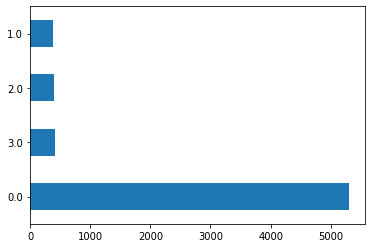

In [469]:
dfres['Res1'].value_counts().plot(kind = 'barh')


Possible useful sources:


1.   https://www.thepythoncode.com/article/building-a-speech-emotion-recognizer-using-sklearn
2.   https://www.intechopen.com/chapters/63970

Usefule Libraries:


1.   https://librosa.org/doc/latest/index.html
2.   https://github.com/tyiannak/pyAudioAnalysis/






https://github.com/x4nth055/emotion-recognition-using-speech

https://sonsuzdesign.blog/2021/03/15/building-a-speech-emotion-recognizer-using-python/

Librosa has more documentation.

## pre processing noise reduction

In [ ]:
import boto3
from botocore.exceptions import ClientError

def create_presigned_url(bucket_name, object_name, expiration=3600, method='get_object'):
    client = boto3.client('s3')
    try:
        return client.generate_presigned_url(method,
            Params={ 'Bucket': bucket_name, 'Key': object_name },
            ExpiresIn=expiration
            )
    except ClientError as e:
        print(e)

In [ ]:
import os

# Read API Key from runtime environment
api_key = os.environ['DOLBYIO_API_KEY']

KeyError: ignored

## 

## Pre processing for modelling

###imports


In [6]:


import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import os



In [7]:
df_train1 = df_train.drop(['Res1','Res2'], inplace=False, axis=1)

In [8]:
df_test1 = df_test.drop(['Res1','Res2'], inplace=False, axis=1)

### Feature extraction using liberosa

In [9]:
def extract_features(files):
    # Sets the name to be the path to where the file is in my computer
    file_name = "/content/drive/MyDrive/Voice Tone/Train Files/"+str(files)+".wav"
    print(file_name)
    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=120).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate,n_mels=128).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    #label = files.label

    return mfccs, chroma, mel, contrast, tonnetz


In [158]:
def extract_features1(files):
    # Sets the name to be the path to where the file is in my computer
    file_name = "/content/drive/MyDrive/Voice Tone/Train Files/"+str(files)+".wav"
    print(file_name)
    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate,n_mels=512).T,axis=0)

    

    return  mel


In [183]:
def extract_features2(files):
    # Sets the name to be the path to where the file is in my computer
    file_name = "/content/drive/MyDrive/Voice Tone/Voice Tone Test Audio Files/"+str(files)+".wav"
    print(file_name)
    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=120).T,axis=0)

    

    return  mfccs

In [ ]:
test120mf = df_test['FileName'].apply(extract_features2)

In [ ]:
features_label = df_train['FileName'].apply(extract_features1)

### Saving data for reuse to save time

In [190]:
test120 =  pd.DataFrame(test120mf)

In [ ]:
mel128db =  pd.DataFrame(test128)

In [ ]:
mel512db


In [ ]:
dflabels =  pd.read_csv('/content/drive/MyDrive/Voice Tone/labelsfin .csv')

In [ ]:
dflabels

In [12]:
dfmf120= pd.DataFrame(mfcc120['FileName'].to_list(), columns=['mfccs', 'chroma', 'mel', 'contrast', 'tonnetz'])

In [193]:
test120.to_json(r'/content/drive/MyDrive/Voice Tone/test120.json')

In [197]:
findf = pd.read_json('/content/drive/MyDrive/Voice Tone/mfcc120.json')


In [347]:
tesdf = pd.read_json('/content/drive/MyDrive/Voice Tone/testdaf.json')

In [533]:
train512 = pd.read_json('/content/drive/MyDrive/Voice Tone/train512.json')

In [535]:
test512 = pd.read_json('/content/drive/MyDrive/Voice Tone/test512.json')


In [ ]:
tesdf['newcol'] = tesdf['mel'] + tesdf['tonnetz'] + tesdf['chroma'] + tesdf['mfccs'] 

In [201]:
dfres = pd.read_json('/content/drive/MyDrive/voicedataop.json')

### test data from test set

In [511]:
testX = np.array(test120['FileName'].tolist())

In [372]:
testres1 = (test120['FileName'].tolist())

In [512]:
testX.shape

(942, 120)

In [ ]:
findf

So there are 15 labels combining both the labels, We wil test unsupervised lelarning with two output for raw train .

## NN

### created a column called op for output and added as string so that we have labels for correct predictions. 
### So it makes a labels and while classification we know that accuracy is correct because a clssification is only correct if both res1 ans res2 are correctly indentified

In [599]:
dfres['op1'] = dfres['Res1'].astype(str) + dfres['Res2'].astype(str)

In [614]:
dftesttrue['opt'] = dftesttrue['Res1'].astype(str) + dftesttrue['Res2'].astype(str)

In [ ]:
findf['op']

0       0.00.0
1       1.03.0
2       0.02.0
3       2.05.0
4       0.02.0
         ...  
6495    0.05.0
6496    0.01.0
6497    0.02.0
6498    0.01.0
6499    0.02.0
Name: op, Length: 6500, dtype: object

In [597]:
findf = findf.fillna(0)
dfres = dfres.fillna(0)

### encoding and final databse

In [56]:
dummy_Res1 = pd.get_dummies(findf['Res1'], prefix='Res1_')

In [57]:
dummy_Res2 = pd.get_dummies(findf['Res2'], prefix='Res2_')

In [58]:
findft = pd.concat([findf,dummy_Res1,dummy_Res2 ], axis=1)

In [ ]:
# We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network
#this did not yield good results.

features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1], 
                features_label[i][2], features_label[i][3],
                features_label[i][4]), axis=0))

In [ ]:
X = np.array(features)

### pulling from the database and define input and output. And Split and scale

In [590]:
X = np.array(findf['mfccs'].tolist())

In [591]:
x = np.array(findf['chroma'].tolist())

In [592]:
X.shape

(6500, 120)

In [615]:


y = np.array(dfres[['Res2']])
yt = np.array(dftesttrue[['opt']])


In [616]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))
yt = to_categorical(lb.fit_transform(yt))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [603]:
y.shape

(6500, 21)

In [604]:
#Splitting for testing training and design
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.20, random_state= 8)

In [477]:
#Testing for output and training on bigger set for prediction
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [499]:
y_val.shape

(1170, 6)

In [605]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)
testres1 = ss.fit_transform(testres1)
testX = ss.transform(testX)

### Feed forwad network

In [606]:
# Build a simple dense model with early stopping with softmax for categorical classification

model = Sequential()

model.add(Dense(120 ,input_shape=(120,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.25))  
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.35))  

model.add(Dense(20, activation = 'sigmoid'))
model.add(Dropout(0.2))    

model.add(Dense(21, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [609]:


# fitting the model with the train data and validation with the validation data
# we used early stop with patience 100 because we did not want to use early stop
# I leave the early stop regularization code in case anyone wants to use it

history = model.fit(X_train, y_train, batch_size=128, epochs=50, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
                    



Epoch 1/50
37/37 [==============================] - 0s 10ms/step - loss: 0.8078 - accuracy: 0.7410 - val_loss: 2.3385 - val_accuracy: 0.3949
Epoch 2/50
37/37 [==============================] - 0s 11ms/step - loss: 0.7619 - accuracy: 0.7592 - val_loss: 2.3365 - val_accuracy: 0.4009
Epoch 3/50
37/37 [==============================] - 1s 14ms/step - loss: 0.7782 - accuracy: 0.7470 - val_loss: 2.3068 - val_accuracy: 0.4060
Epoch 4/50
37/37 [==============================] - 0s 10ms/step - loss: 0.7803 - accuracy: 0.7483 - val_loss: 2.3256 - val_accuracy: 0.3991
Epoch 5/50
37/37 [==============================] - 0s 11ms/step - loss: 0.7895 - accuracy: 0.7427 - val_loss: 2.3302 - val_accuracy: 0.4068
Epoch 6/50
37/37 [==============================] - 0s 11ms/step - loss: 0.7880 - accuracy: 0.7436 - val_loss: 2.3083 - val_accuracy: 0.3991
Epoch 7/50
37/37 [==============================] - 0s 12ms/step - loss: 0.7708 - accuracy: 0.7451 - val_loss: 2.3543 - val_accuracy: 0.3932
Epoch 8/50
37

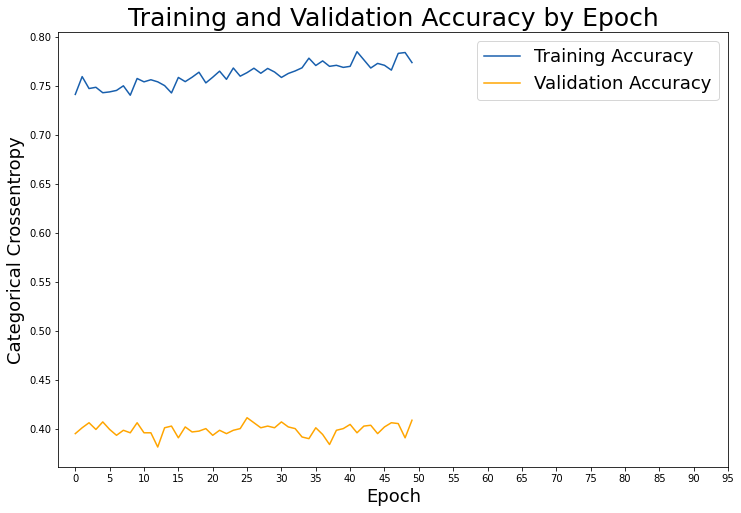

In [610]:
import matplotlib.pyplot as plt

# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,50,5), range(0,50,5))

plt.legend(fontsize = 18);



In [619]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(testX, yt, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8702991604804993
Testing Accuracy:  0.4012738764286041


above are scores for one of the test set for 21 categorical answer.

In [613]:
dftesttrue = pd.read_csv('/content/truevoice.csv')

In [525]:
ss = StandardScaler()
X = ss.fit_transform(X)
testX = ss.fit_transform(testX)

In [617]:
# We get our predictions from the test data
predict_x=model.predict(testX) 
classes_xres1=np.argmax(predict_x,axis=1)


In [618]:
#Predictions for the 21 classes
classes_xres1

array([ 2,  4,  0,  0,  3,  2,  4,  1,  4,  2, 16,  4,  4,  5, 15,  3,  1,
        1,  3,  0,  0,  4,  2,  5,  3, 13,  0,  4,  5,  0,  3,  5,  3,  2,
        0,  8,  4,  0,  2,  3,  3,  5,  1,  0,  7,  1, 10,  3,  1,  4,  1,
        5,  9, 15,  2,  1,  0,  4,  0,  4,  4,  4,  3,  2,  4,  5,  1,  4,
        5,  0,  3,  5, 13,  4,  2,  3, 18,  1,  4,  1,  3,  5,  3, 12,  1,
        5,  0,  4,  2,  2,  4,  2,  8,  1,  1, 11,  3,  2,  4,  4,  1,  2,
        4,  0,  8,  4,  0,  3,  1,  3,  4,  5,  0, 16,  0, 14,  8,  4,  1,
        2,  5,  4,  5,  3,  4, 11, 14,  4,  2, 12,  0,  3,  0,  5,  2,  4,
        0,  3,  1,  2,  1,  2,  5,  1,  5, 12,  0,  1,  8,  0,  5,  0,  0,
        2,  3,  3,  0,  0,  2,  1, 18,  1,  1, 11,  3,  3,  4,  5,  3,  1,
        3,  8,  7,  0,  3,  5,  0,  3,  5,  1, 12, 20,  3,  1,  4,  0, 16,
       13,  3,  3,  1, 14,  1,  2,  9,  2,  2,  3,  1,  3,  4,  4,  3,  9,
        5,  0,  3,  0,  5,  0,  4,  2,  5,  4,  3,  3, 15,  5,  1,  3,  3,
        5, 12,  0, 20,  3

In [620]:
restrue = pd.DataFrame(classes_xres1)

In [621]:
restrue.value_counts()

4     150
3     148
1     140
0     136
5     128
2      85
15     20
12     19
18     18
7      18
8      18
16     13
9      12
14     11
11      9
13      8
10      5
17      2
20      2
dtype: int64

In [622]:
restrue.to_csv('restrue.csv')

## CNN

In [559]:
from sklearn.preprocessing import LabelEncoder


# Convert features and corresponding classification labels into numpy arrays
#X = np.array(findf['mel'].tolist())
X = np.array(train512['FileName'].tolist())
testx512 = np.array(test512['FileName'].tolist())
y = np.array(dfres['Res2'].tolist())
#x = np.concatenate([X,x1])
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 



In [560]:
X.shape

(6500, 512)

In [561]:
ss = StandardScaler()
X = ss.fit_transform(X)
testX = ss.fit_transform(testX)
testx512 = ss.fit_transform(testx512)

In [562]:
X = X.reshape(6500,32,16)

In [563]:
testx512 = testx512.reshape(942,32,16)

In [554]:
# split the dataset 
from sklearn.model_selection import train_test_split 

#x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

In [564]:
x_train, x_val, y_train, y_val = train_test_split(X, yy, test_size=0.15, random_state = 42)

In [556]:
y_val.shape

(975, 6)

In [565]:
x_train = x_train[...,np.newaxis]
x_val = x_val[...,np.newaxis]
x_test = x_test[...,np.newaxis]
testx512 = testx512[...,np.newaxis]

In [566]:
x_train.ndim

4

In [567]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D,Convolution1D, Conv2D,Conv1D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization, MaxPool2D
#from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

In [574]:
model1 = keras.Sequential()
model1.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(32, 16, 1), activation='relu' ))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(keras.layers.BatchNormalization())
# layer 2
model1.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(16, 8, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(keras.layers.BatchNormalization())
#3rd layer
#model1.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=(16, 8, 1), activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2,2)))
#model1.add(keras.layers.BatchNormalization())
#4th

model1.add(Flatten())
model1.add(Dense(32,activation='relu'))
#model1.add(keras.layers.Dropout(0.4))
#model1.add(Dropout(0.2))
model1.add(Dense(32, activation='sigmoid'))
#output layer
model1.add(keras.layers.Dense(6,activation='softmax'))

In [575]:
optimizers = tensorflow.keras.optimizers.Adam(learning_rate  = 0.001)
model1.compile(optimizer = optimizers,loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
output1 = model1.fit(x_train,y_train, validation_data = (x_val,y_val), batch_size = 128 , epochs = 100)

In [ ]:
output1

In [ ]:
score = model1.predict(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model1.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.5538461804389954
Testing Accuracy:  0.36076924204826355


In [313]:
score = model1.predict(testX)
classes_x = np.argmax(score,axis=1)

In [314]:
classes_x

array([1, 1, 0, 0, 3, 5, 4, 5, 5, 0, 0, 4, 4, 5, 1, 3, 3, 2, 3, 1, 0, 1,
       5, 4, 3, 1, 3, 4, 5, 0, 3, 2, 5, 5, 0, 5, 3, 0, 2, 1, 0, 1, 5, 3,
       2, 0, 5, 5, 4, 5, 4, 2, 1, 2, 5, 5, 1, 3, 0, 4, 2, 5, 3, 0, 4, 5,
       3, 4, 4, 1, 0, 2, 0, 3, 5, 0, 3, 0, 2, 4, 3, 5, 1, 5, 3, 1, 0, 5,
       3, 2, 1, 1, 3, 1, 5, 3, 0, 4, 5, 5, 0, 0, 5, 2, 1, 1, 3, 1, 4, 4,
       5, 1, 5, 0, 3, 5, 4, 4, 0, 2, 5, 0, 5, 1, 4, 1, 5, 4, 1, 3, 0, 2,
       0, 5, 3, 4, 0, 0, 4, 1, 3, 0, 5, 5, 2, 1, 0, 5, 1, 0, 1, 3, 0, 2,
       0, 3, 0, 0, 0, 5, 1, 0, 1, 0, 3, 2, 5, 5, 0, 4, 0, 5, 1, 3, 3, 4,
       0, 0, 1, 1, 3, 5, 4, 5, 1, 0, 0, 3, 3, 3, 0, 3, 1, 5, 3, 0, 3, 2,
       3, 4, 1, 5, 3, 0, 5, 0, 4, 0, 5, 0, 2, 0, 5, 5, 4, 4, 0, 5, 5, 3,
       4, 5, 2, 3, 1, 2, 1, 4, 4, 2, 5, 3, 1, 4, 4, 2, 5, 4, 1, 0, 4, 0,
       4, 3, 3, 3, 5, 4, 0, 3, 1, 0, 0, 1, 5, 0, 2, 5, 0, 0, 3, 0, 4, 4,
       4, 0, 3, 3, 1, 1, 3, 0, 3, 3, 5, 4, 1, 1, 0, 3, 5, 3, 0, 5, 3, 3,
       3, 3, 3, 3, 5, 0, 1, 1, 4, 3, 5, 1, 3, 1, 5,

In [315]:
cnv2res = pd.DataFrame(classes_x)

In [317]:
cnv2res.value_counts()

5    232
0    190
3    158
4    140
1    136
2     86
dtype: int64

In [318]:
cnv2res.to_csv('cnv2res.csv')

## Random forest


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Convert features and corresponding classification labels into numpy arrays
X = np.array(findf['mfcc'].tolist())
x1 = np.array(findf['chroma'].tolist())
y = np.array(findf['Res1'].tolist())
#x = np.concatenate([X,x1])
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x1, yy, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8076923076923077


In [470]:
import os
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np

sig, fs = librosa.load('/content/drive/MyDrive/Voice Tone/Train Files/10017537.wav')   
# make pictures name 
save_path = 'test.jpg'

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
S = librosa.feature.melspectrogram(y=sig, sr=fs)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()